In [1]:
"""
It consists of scraping the following information from IMDB adventures movies:

Movie name
Description
Release Date
Director Name
Rating
Duration
Genre
Stars (Actors)
Filming Dates
"""

'\nIt consists of scraping the following information from IMDB adventures movies:\n\nMovie name\nDescription\nRelease Date\nDirector Name\nRating\nDuration\nGenre\nStars (Actors)\nFilming Dates\n'

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# requests used to get the URL
#path = "https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=adventure&start=51&ref_=adv_nxt"

# the above is normal url, but we want from 1 to 100 movies, so we want to change the number (start = 100)
path = f'https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=adventure&start=1&ref_=adv_nxt'
data = requests.get(path)
print(data)

<Response [200]>


In [23]:
soup = BeautifulSoup(data.content, "html.parser")



regular expression
regex
to use str.extract, I need a pd.Series
str.extract works only with pd.Series objects



output of str.extract -> dataframe(rows and columns)

In [14]:
description_container = soup.select('.text-muted+ .text-muted , .ratings-bar+ .text-muted')
descrip = []

for tag in description_container:
    descrip.append(tag.text.replace('\n', ''))



50

In [35]:
big_container = soup.select('.lister-item-content')
dur = []
for tag in big_container:
    dur.append( pd.Series(tag.text).str.extract(r'(\d+) min').squeeze())
    # print('='*100)



# dur

In [47]:
rate = []
for tag in big_container:
    # print(tag.text.replace('\n', ''))
    print(   pd.Series(tag.text.replace('\n', '')).str.extract(r'(\d+\.\d)Rate this').squeeze()  )
    print('='*100)


6.8
7.1
8.6
6.3
6.7
7.2
8.1
7.5
6.4
7.2
7.5
7.3
7.2
5.4
8.4
7.7
8.1
8.7
6.6
7.5
8.8
6.0
7.6
6.5
8.9
8.1
7.4
8.3
7.4
8.5
6.7
6.7
6.3
8.4
8.0
7.3
7.8
7.2
8.2
5.8
7.7
6.6
7.3
6.5
8.6
7.0
8.1
7.9
7.3
7.4


pattern for extracting rating. \d+.\dRate this

# Title
## smal header
#### header
normal test
* bulltet1
* bulltet 2

this a normale...I want to put this **bold**...this is ***italic***
this is the link to [imdb](https://www.imdb.com/search/title/?title_type=feature&genres=adventure&explore=genres&ref_=adv_prv)

$ x^2$


In [5]:
# extract movie name

movie_name = []
imdb_movie_name = soup.find_all('h3', class_ ='lister-item-header')  
for movie in imdb_movie_name:
    movie_name.append(movie.a.text)     # a used to remove the numbers
#print(movie_name)

len(movie_name)

50

In [6]:
# extract movie runtime

movie_runtime = []
imdb_movie_runtime = soup.find_all('span', class_ ='runtime')           
for runtime in imdb_movie_runtime:
  movie_runtime.append(runtime.text)
print(movie_runtime[:5])

len(movie_runtime)

['143 min', '142 min', '179 min', '147 min', '115 min']


50

In [7]:
# extract movie genre

movie_genre = []
imdb_movie_genre = soup.find_all('span', class_ ='genre')           
for genre in imdb_movie_genre:
  movie_genre.append(genre.text.replace("\n", "").strip())
#print(movie_genre)

len(movie_genre)

50

In [8]:
# extract movie rating

movie_rating = []
imdb_movie_rating = soup.find_all('div', class_ ='inline-block ratings-imdb-rating')           
for rating in imdb_movie_rating:
  rating1 = float(rating.text.replace("\n", ""))
  movie_rating.append(rating1)
print(movie_rating)

len(movie_rating)

[7.1, 7.9, 8.8, 7.7, 7.0, 7.5, 7.0, 8.1, 6.9, 6.6, 7.1, 8.4, 5.4, 6.9, 7.7, 7.2, 8.1, 7.9, 5.8, 8.2, 8.6, 6.6, 5.2, 8.4, 7.4, 5.6, 7.7, 7.6, 6.6, 8.0, 7.5, 5.7, 6.7, 8.0, 6.9, 7.0, 8.4, 8.8, 6.9, 7.5, 7.9, 5.7, 6.6, 7.8, 6.9, 8.0, 7.9, 6.1, 8.1, 6.5]


50

In [9]:
# extract movie description
movie_desc = []

# 'div' is the mother for the 'p'
# we want to take mother because we are having two 'p' child
# so only we are using [1] that means second element
# to take the second child 'p'

imdb_movie_desc = soup.find_all('div', class_ ='lister-item-content')  

for description in imdb_movie_desc:
  p_tags = description.find_all('p', class_='text-muted')
  desc = p_tags[1].text
  movie_desc.append(desc.replace('\n', ""))

print(movie_desc[:2])

len(movie_desc)

['An alien child is evacuated from his dying world and sent to Earth to live among humans. His peace is threatened when other survivors of his home planet invade Earth.', 'Harry Potter, Ron and Hermione return to Hogwarts School of Witchcraft and Wizardry for their third year of study, where they delve into the mystery surrounding an escaped prisoner who poses a dangerous threat to the young wizard.']


50

In [10]:
# extract release year

movie_year = []
imdb_movie_year = soup.find_all('span', class_ ='lister-item-year')           
for release_year in imdb_movie_year:
  year = int(release_year.text.replace("(", "").replace(")", "").replace("I", ""))
  movie_year.append(year)
print(movie_year)

len(movie_year)

[2013, 2004, 2002, 2018, 2011, 1963, 2012, 2012, 2016, 2016, 2007, 1981, 2020, 2013, 1985, 2006, 1959, 2015, 1980, 2011, 2001, 2014, 2002, 1986, 2004, 2020, 2010, 2012, 2013, 2016, 2013, 2021, 2005, 2006, 2021, 2019, 2017, 1966, 2018, 2013, 1982, 2020, 2002, 2016, 2016, 2015, 2000, 2021, 2007, 2020]


50

In [11]:
# extract movie director

movie_dir = []
imdb_movie_dir = soup.find_all('p', class_ ='')  

# [0] is first index or first element 1
# [1] is second index or second element 2
# to extract the director name from the actor we are using this method
         
for director in imdb_movie_dir:
  
  #movie_dir.append(director.text.replace("\n", "").split('|'))
#print(movie_dir[:5])
  #movie_dir.append(director.text.replace("\n", "").split('|')[0])
#print(movie_dir[:5])
   #movie_dir.append(director.text.replace("\n", "").split('|')[0].split(':'))
#print(movie_dir[:5])
    movie_dir.append(director.text.replace("\n", "").split('|')[0].split(':')[1])
print(movie_dir[:5])


len(movie_dir)

['Zack Snyder', 'Alfonso Cuarón', 'Peter Jackson', 'Christopher McQuarrie', 'Kenneth Branagh']


50

In [12]:
# extract actor

movie_actor = []
imdb_movie_actor = soup.find_all('p', class_ ='') 

# we want stars, so we remove others
for actor in imdb_movie_actor:
  movie_actor.append(actor.text.replace('\n', "").split('Stars:')[1])
print(movie_actor[:3])

len(movie_actor)

['Henry Cavill, Amy Adams, Michael Shannon, Diane Lane', 'Daniel Radcliffe, Emma Watson, Rupert Grint, Richard Griffiths', 'Elijah Wood, Ian McKellen, Viggo Mortensen, Orlando Bloom']


50

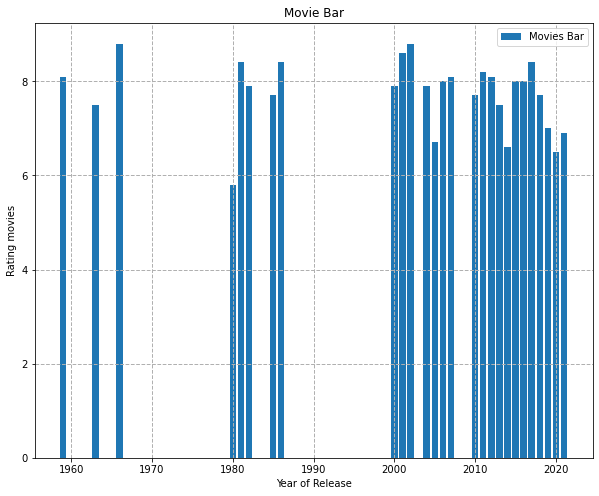

In [13]:
# visualizations

plt.figure(figsize=(10, 8))
plt.bar(movie_year, movie_rating, label = 'Movies Bar')
plt.xlabel('Year of Release')
plt.ylabel('Rating movies')
plt.title('Movie Bar')
plt.legend()
plt.grid(True, linestyle ='--', linewidth = 1)
plt.show()


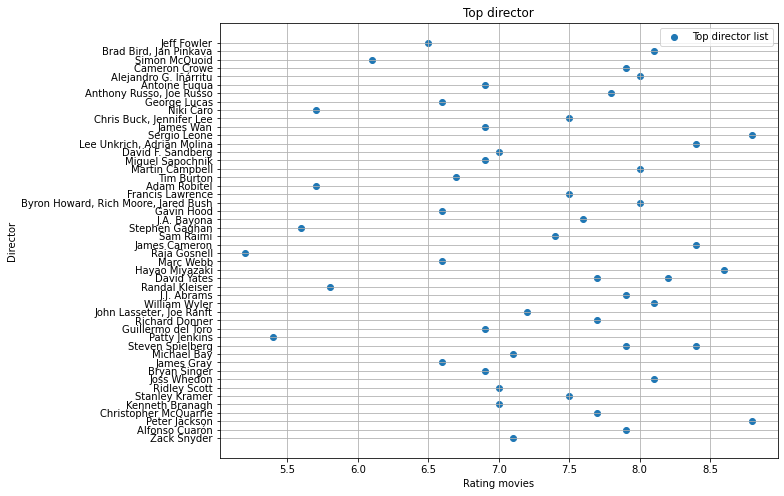

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(movie_rating, movie_dir, label = 'Top director list')
plt.xlabel('Rating movies')
plt.ylabel('Director')
plt.title('Top director')
plt.legend()
plt.grid(True)
plt.show()


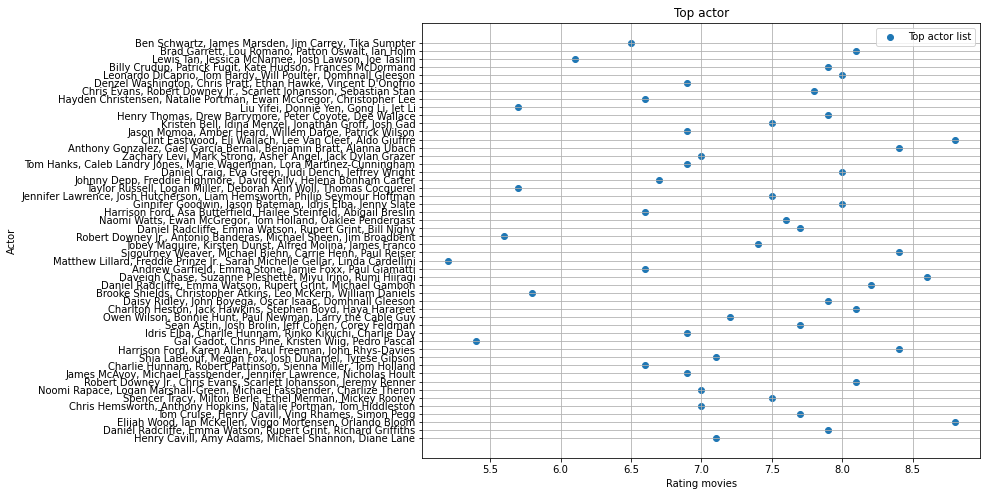

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(movie_rating, movie_actor, label = 'Top actor list')
plt.xlabel('Rating movies')
plt.ylabel('Actor')
plt.title('Top actor')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# converted movie duration into int

converted_duration = []
for i in movie_runtime:
    duration = int(i.replace('min', ""))
    converted_duration.append(duration)
print(converted_duration)

[143, 142, 179, 147, 115, 210, 124, 143, 144, 141, 144, 115, 151, 131, 114, 117, 212, 138, 104, 130, 125, 142, 86, 137, 127, 101, 146, 114, 114, 108, 146, 88, 115, 144, 115, 132, 105, 161, 143, 102, 115, 115, 142, 147, 132, 156, 122, 110, 111, 99]


In [17]:
# normalized value

df = pd.DataFrame({
               'Rating': movie_rating,
               'Duration': converted_duration
              })
normalized_df = (df - df.min()) / (df.max() - df.min())
print(normalized_df)


      Rating  Duration
0   0.527778  0.452381
1   0.750000  0.444444
2   1.000000  0.738095
3   0.694444  0.484127
4   0.500000  0.230159
5   0.638889  0.984127
6   0.500000  0.301587
7   0.805556  0.452381
8   0.472222  0.460317
9   0.388889  0.436508
10  0.527778  0.460317
11  0.888889  0.230159
12  0.055556  0.515873
13  0.472222  0.357143
14  0.694444  0.222222
15  0.555556  0.246032
16  0.805556  1.000000
17  0.750000  0.412698
18  0.166667  0.142857
19  0.833333  0.349206
20  0.944444  0.309524
21  0.388889  0.444444
22  0.000000  0.000000
23  0.888889  0.404762
24  0.611111  0.325397
25  0.111111  0.119048
26  0.694444  0.476190
27  0.666667  0.222222
28  0.388889  0.222222
29  0.777778  0.174603
30  0.638889  0.476190
31  0.138889  0.015873
32  0.416667  0.230159
33  0.777778  0.460317
34  0.472222  0.230159
35  0.500000  0.365079
36  0.888889  0.150794
37  1.000000  0.595238
38  0.472222  0.452381
39  0.638889  0.126984
40  0.750000  0.230159
41  0.138889  0.230159
42  0.38888

In [18]:
# join scraped data into a dataframe

imdb_movie = pd.DataFrame({ 'Movie Name' : movie_name,
               'Yaer of Release': movie_year,
                'Duration': movie_runtime,
                'Genre': movie_genre,
                'Rating': movie_rating,
                'Actor': movie_actor,
                'Director': movie_dir,
                'Description': movie_desc
                 })

imdb_movie

,Movie Name,Yaer of Release,Duration,Genre,Rating,Actor,Director,Description
0,Man of Steel,2013,143 min,"Action, Adventure, Sci-Fi",7.1,"Henry Cavill, Amy Adams, Michael Shannon, Dian...",Zack Snyder,An alien child is evacuated from his dying wor...
1,Harry Potter und der Gefangene von Askaban,2004,142 min,"Adventure, Family, Fantasy",7.9,"Daniel Radcliffe, Emma Watson, Rupert Grint, R...",Alfonso Cuarón,"Harry Potter, Ron and Hermione return to Hogwa..."
2,Der Herr der Ringe: Die zwei Türme,2002,179 min,"Action, Adventure, Drama",8.8,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",Peter Jackson,While Frodo and Sam edge closer to Mordor with...
3,Mission: Impossible - Fallout,2018,147 min,"Action, Adventure, Thriller",7.7,"Tom Cruise, Henry Cavill, Ving Rhames, Simon Pegg",Christopher McQuarrie,"Ethan Hunt and his IMF team, along with some f..."
4,Thor,2011,115 min,"Action, Adventure, Fantasy",7.0,"Chris Hemsworth, Anthony Hopkins, Natalie Port...",Kenneth Branagh,The powerful but arrogant god Thor is cast out...
5,"Eine total, total verrückte Welt",1963,210 min,"Action, Adventure, Comedy",7.5,"Spencer Tracy, Milton Berle, Ethel Merman, Mic...",Stanley Kramer,A group of motorists witnesses a car crash in ...
6,Prometheus - Dunkle Zeichen,2012,124 min,"Adventure, Mystery, Sci-Fi",7.0,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",Ridley Scott,"Following clues to the origin of mankind, a te..."
7,The Avengers,2012,143 min,"Action, Adventure, Sci-Fi",8.1,"Robert Downey Jr., Chris Evans, Scarlett Johan...",Joss Whedon,Earth's mightiest heroes must come together an...
8,X-Men: Apocalypse,2016,144 min,"Action, Adventure, Sci-Fi",6.9,"James McAvoy, Michael Fassbender, Jennifer Law...",Bryan Singer,In the 1980s the X-Men must defeat an ancient ...
9,Die versunkene Stadt Z,2016,141 min,"Adventure, Biography, Drama",6.6,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",James Gray,"A true-life drama, centering on British explor..."
